### Description:
This notebook is working with a creative-commons licensed dataset provided Olist, a Brazilian e-commerce marketplace integrator.
The e-commerce website enables independent sellers to sell their products through the ecommerce Store and ship them directly to the customers.
After a customer purchases a product, a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where she can rate and review the purchase experience.


### Dataset description:
The dataset has information of 100k orders from 2016 to 2018. The dataset contains order status, price, payment and delivery time to the customer location, product attributes, and reviews written by customers.The geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

In [1]:
# pip install spacy, nltk, google-trans-new
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from glob import glob
from hops import hdfs

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import time

start = time.time()

customers_df = pd.read_csv(hdfs.project_path() + "ecommerce/customer.csv")
geolocation_df = pd.read_csv(hdfs.project_path() + "ecommerce/geolocation.csv")
orders_df = pd.read_csv(hdfs.project_path() + "ecommerce/order.csv")
order_items_df = pd.read_csv(hdfs.project_path() + "ecommerce/order_item.csv")
order_payments_df = pd.read_csv(hdfs.project_path() + "ecommerce/order_payment.csv")
order_reviews_df = pd.read_csv(hdfs.project_path() + "ecommerce/order_review.csv")
products_df = pd.read_csv(hdfs.project_path() + "ecommerce/product.csv")
sellers_df = pd.read_csv(hdfs.project_path() + "ecommerce/seller.csv")
category_transalations_df = pd.read_csv(hdfs.project_path() + "ecommerce/product_category_name_translation.csv")
end = time.time()
print(end - start)

6.129397630691528


In [3]:
# Lets check the size of each df:
df_names = ['customers_df','geolocation_df', 'orders_df', 'order_items_df','order_payments_df',
            'order_reviews_df','products_df','sellers_df', 'category_transalations_df' ]
for df in df_names:
    print("Dataset {} has shape {}".format(df, eval(df).shape))

Dataset customers_df has shape (99441, 5)
Dataset geolocation_df has shape (1000163, 5)
Dataset orders_df has shape (99441, 9)
Dataset order_items_df has shape (112650, 7)
Dataset order_payments_df has shape (103886, 5)
Dataset order_reviews_df has shape (99224, 7)
Dataset products_df has shape (32340, 10)
Dataset sellers_df has shape (3095, 4)
Dataset category_transalations_df has shape (71, 2)


### Data Schema

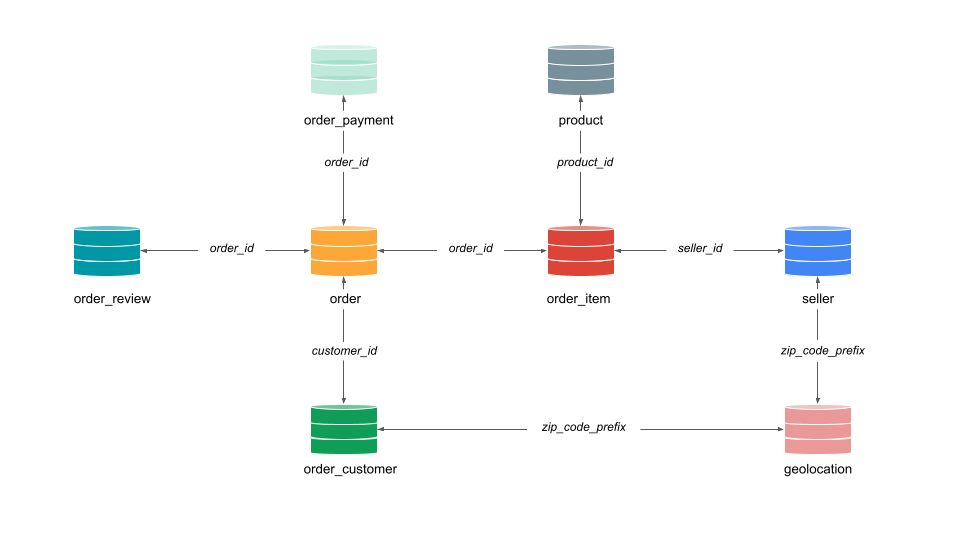


### Description of various columns in different csv files

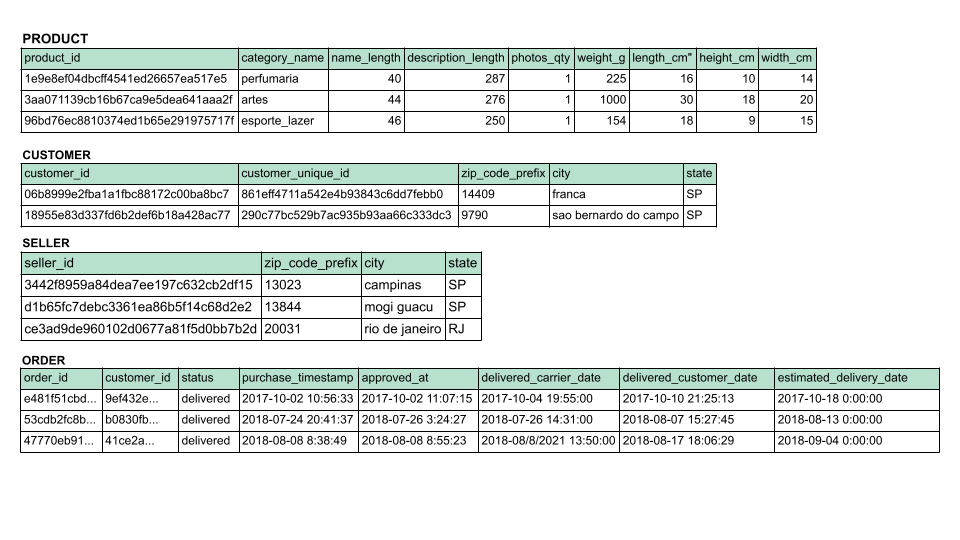

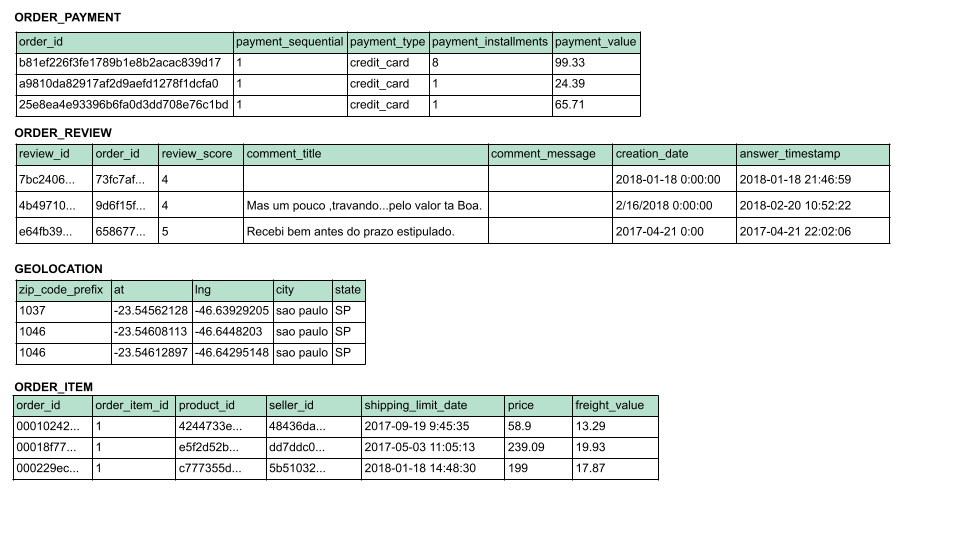

In [4]:
df = pd.merge(orders_df,order_payments_df, on="order_id")
df = pd.merge(df,customers_df, on="customer_id")
df = pd.merge(df,order_items_df, on="order_id")
df = pd.merge(df,sellers_df, on="seller_id")
df = pd.merge(df,order_reviews_df, on="order_id")
df = pd.merge(df,products_df, on="product_id")
#df = pd.merge(df,geolocation_df, left_on="" right_on="geolocation_zip_code_prefix")
df = pd.merge(df,category_transalations_df, on="product_category_name")
df.shape

(115608, 42)

In [5]:
df.head()

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Unnamed: 0,product_category_name,product_name_len,product_description_len,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,25715,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,70351,b46f1e34512b0f4c74a72398b03ca788,4,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,26730,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,18982,dc90f19c2806f1abba9e72ad3c350073,5,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [6]:
df.isnull().sum()

Unnamed: 0_x                     0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
Unnamed: 0_y                     0
review_id                        0
review_score        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115608 entries, 0 to 115607
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0_x                   115608 non-null  int64  
 1   order_id                       115608 non-null  object 
 2   customer_id                    115608 non-null  object 
 3   order_status                   115608 non-null  object 
 4   order_purchase_timestamp       115608 non-null  object 
 5   order_approved_at              115608 non-null  object 
 6   order_delivered_carrier_date   115608 non-null  object 
 7   order_delivered_customer_date  115608 non-null  object 
 8   order_estimated_delivery_date  115608 non-null  object 
 9   payment_sequential             115608 non-null  int64  
 10  payment_type                   115608 non-null  object 
 11  payment_installments           115608 non-null  int64  
 12  payment_value                 

## Products Analysis
#### Top 25 Product catgeories

In [8]:
print("Number of unique categories: ", len(products_df.product_category_name.unique()))

Number of unique categories:  73


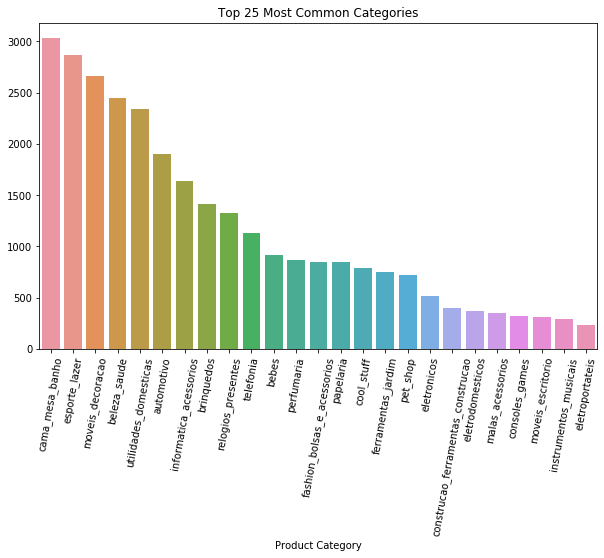

In [9]:
plt.figure(figsize=(10,6))
top_25_prod_categories = products_df.groupby('product_category_name')['product_id'].count().sort_values(ascending=False).head(25)
sns.barplot(x=top_25_prod_categories.index, y=top_25_prod_categories.values)
plt.xticks(rotation=80)
plt.xlabel('Product Category')
plt.title('Top 25 Most Common Categories');
plt.show()

Maximum number of products fall under these top 25 categories

### Lets now do an RFM(Recency, Frequncy, Monetary) Analysis for Behavioural Segmentaion of Customers

In [10]:
from datetime import datetime

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Monetary

In [11]:
df.head()

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Unnamed: 0,product_category_name,product_name_len,product_description_len,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,25715,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,70351,b46f1e34512b0f4c74a72398b03ca788,4,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,26730,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,18982,dc90f19c2806f1abba9e72ad3c350073,5,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [12]:
df.count()

Unnamed: 0_x                     115608
order_id                         115608
customer_id                      115608
order_status                     115608
order_purchase_timestamp         115608
order_approved_at                115608
order_delivered_carrier_date     115608
order_delivered_customer_date    115608
order_estimated_delivery_date    115608
payment_sequential               115608
payment_type                     115608
payment_installments             115608
payment_value                    115608
customer_unique_id               115608
customer_zip_code_prefix         115608
customer_city                    115608
customer_state                   115608
order_item_id                    115608
product_id                       115608
seller_id                        115608
shipping_limit_date              115608
price                            115608
freight_value                    115608
seller_zip_code_prefix           115608
seller_city                      115608


In [13]:
# Remove duplicate entries
df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'}, keep='first')
df=df.reindex()

In [14]:
df['total_payment'] = df['payment_value'] * df['payment_installments']

In [15]:
# monetary
grouped_df = df.groupby('customer_unique_id')['total_payment'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['customer_unique_id', 'monetary']
grouped_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1135.20
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,689.76
3,0000f6ccb0745a6a4b88665a16c9f078,174.48
4,0004aac84e0df4da2b147fca70cf8255,1181.34


In [16]:
# frequency
frequency = df.groupby('customer_unique_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['customer_unique_id', 'frequency']
frequency.sort_values("frequency",ascending=False).head()

,customer_unique_id,frequency
51505,8d50f5eadf50201ccdcedfb9e2ac8455,15
22823,3e43e6105506432c953e165fb2acf44c,9
73977,ca77025e7201e3b30c44b472ff346268,7
36755,6469f99c1f9dfae7733b25662e7f1782,7
10077,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [17]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='customer_unique_id', how='inner')
grouped_df.sort_values("monetary",ascending=False).head()

,customer_unique_id,monetary,frequency
79679,da122df9eeddfedc1dc1f5349a1a690c,75716.30,2
80500,dc4802a71eae9be1dd28f5d788ceb526,55434.48,1
32521,58c1b085b54c03a1f1ab5f13d64c2b1c,45970.80,2
86890,edde2314c6c30e864a128ac95d6b2112,45133.20,1
91367,fa562ef24d41361e476e748681810e1e,41752.60,1


In [18]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], infer_datetime_format=True, errors='ignore')

max_date = max(df['order_purchase_timestamp'])
df['diff_days'] =  (max_date-df['order_purchase_timestamp']).dt.days

In [19]:
# Recency
recency = df.groupby('customer_unique_id')['diff_days'].min()
recency = recency.reset_index()
recency.columns = ['customer_unique_id', 'recency']
recency.head()

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292


In [20]:
# merge the grouped_df to recency df
rfm_df = pd.merge(grouped_df, recency, on='customer_unique_id', how='inner')
rfm_df.sort_values("monetary",ascending=False).head()

,customer_unique_id,monetary,frequency,recency
79679,da122df9eeddfedc1dc1f5349a1a690c,75716.30,2,519
80500,dc4802a71eae9be1dd28f5d788ceb526,55434.48,1,567
32521,58c1b085b54c03a1f1ab5f13d64c2b1c,45970.80,2,351
86890,edde2314c6c30e864a128ac95d6b2112,45133.20,1,30
91367,fa562ef24d41361e476e748681810e1e,41752.60,1,157


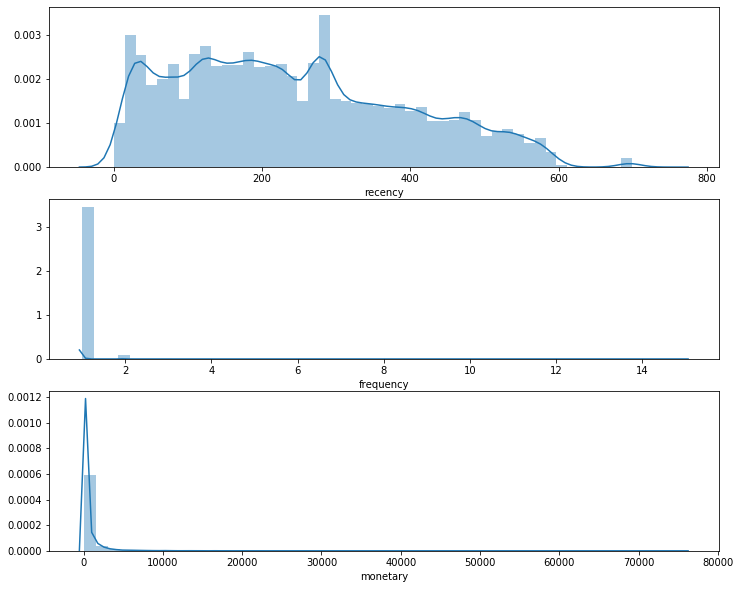

In [21]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_df['monetary'])
# Show the plot
plt.show()

### Lets check for Outliers

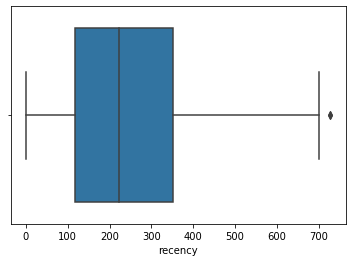

In [22]:
sns.boxplot(rfm_df['recency'])

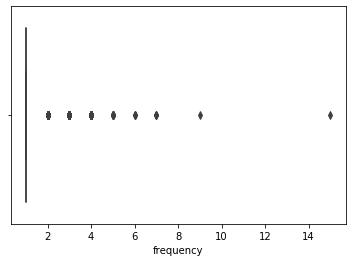

In [23]:
sns.boxplot(rfm_df['frequency'])

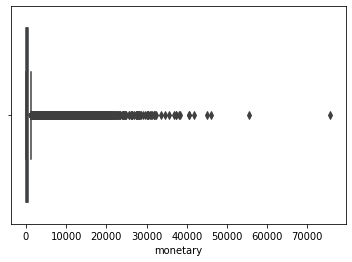

In [24]:
sns.boxplot(rfm_df['monetary'])

### Monetary and Frequency have outliers

In [25]:
# removing (statistical) outliers for monetary
Q1 = rfm_df.monetary.quantile(0.05)
Q3 = rfm_df.monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.monetary >= Q1 - 1.5*IQR) & (rfm_df.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rfm_df.frequency.quantile(0.05)
Q3 = rfm_df.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.frequency >= Q1 - 1.5*IQR) & (rfm_df.frequency <= Q3 + 1.5*IQR)]

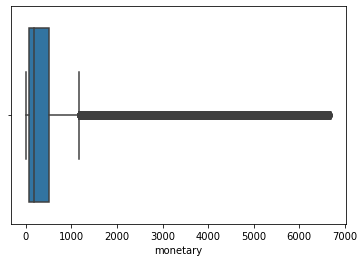

In [26]:
sns.boxplot(rfm_df['monetary'])

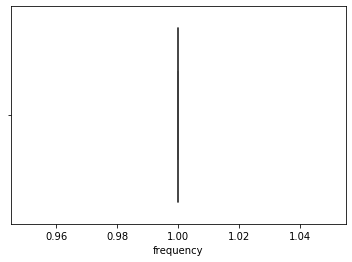

In [27]:
sns.boxplot(rfm_df['frequency'])

#### Scaling

In [28]:
rfm_df_scaled = rfm_df[['monetary', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df_scaled)
rfm_df_scaled.shape

(89385, 3)

In [29]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_scaled.head()

,monetary,frequency,recency
0,0.732473,0.0,-0.829694
1,-0.556909,0.0,-0.810123
2,0.214119,0.0,1.949411
3,-0.385508,0.0,0.540287
4,0.786166,0.0,0.325004


## Lets do the RFM Analysis for the Sellers

We can use the same code above just replacing the groupby column

In [30]:
df.head()

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Unnamed: 0,product_category_name,product_name_len,product_description_len,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_payment,diff_days
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,32790,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,18.12,335
3,25715,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,70351,b46f1e34512b0f4c74a72398b03ca788,4,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,113.31,383
4,26730,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,18982,dc90f19c2806f1abba9e72ad3c350073,5,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,37.77,396
5,32241,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350,maua,SP,16185,1bafb430e498b939f258b9c9dbdff9b1,3,NONE,2017-11-08 00:00:00,2017-11-10 19:52:38,2349,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,44.09,314
6,48879,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,1,credit_card,1,127.45,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,9350,maua,SP,70079,8899ca945efd951c97107b4966289227,1,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,6874,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,127.45,374


In [31]:
# frequency
frequency = df.groupby('seller_id')['order_item_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['seller_id', 'frequency']
frequency.head()

,seller_id,frequency
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,196
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,49
4,004c9cd9d87a3c30c522c48c4fc07416,143


In [32]:
# monetary
monetary = df.groupby('seller_id')['total_payment'].sum()
monetary = monetary.reset_index()
monetary.columns = ['seller_id', 'monetary']
monetary.head()

,seller_id,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,20152.44
1,001cca7ae9ae17fb1caed9dfb1094831,125371.34
2,001e6ad469a905060d959994f1b41e4f,803.82
3,002100f778ceb8431b7a1020ff7ab48f,3189.65
4,004c9cd9d87a3c30c522c48c4fc07416,96321.65


In [33]:
# monetary
recency = df.groupby('seller_id')['diff_days'].min()
recency = recency.reset_index()
recency.columns = ['seller_id', 'recency']
recency.head()

,seller_id,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,320
1,001cca7ae9ae17fb1caed9dfb1094831,52
2,001e6ad469a905060d959994f1b41e4f,26
3,002100f778ceb8431b7a1020ff7ab48f,143
4,004c9cd9d87a3c30c522c48c4fc07416,124


In [34]:
rfm_seller_df = pd.merge(frequency, monetary, on='seller_id', how='inner')
rfm_seller_df = pd.merge(rfm_seller_df, recency, on='seller_id', how='inner')
rfm_seller_df.head()

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,20152.44,320
1,001cca7ae9ae17fb1caed9dfb1094831,196,125371.34,52
2,001e6ad469a905060d959994f1b41e4f,1,803.82,26
3,002100f778ceb8431b7a1020ff7ab48f,49,3189.65,143
4,004c9cd9d87a3c30c522c48c4fc07416,143,96321.65,124


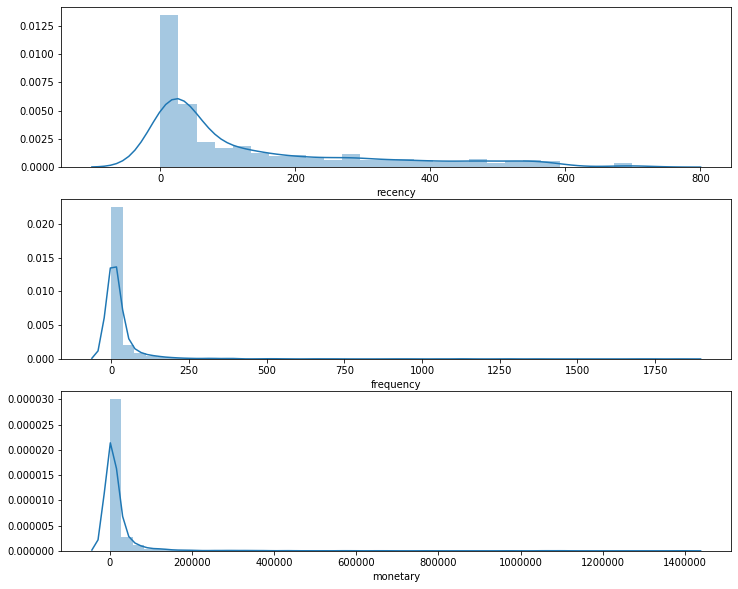

In [35]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_seller_df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_seller_df['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_seller_df['monetary'])
# Show the plot
plt.show()

#### Outlier detection

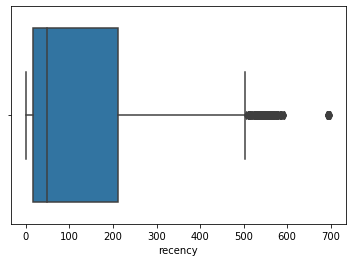

In [36]:
sns.boxplot(rfm_seller_df['recency'])

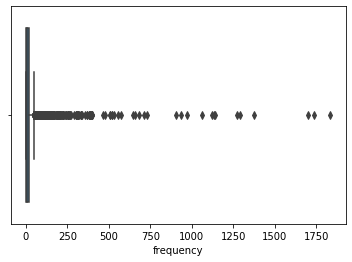

In [37]:
sns.boxplot(rfm_seller_df['frequency'])

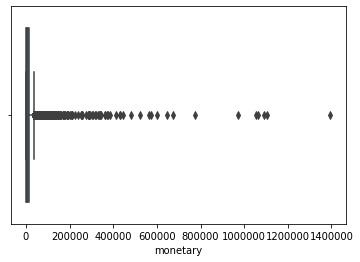

In [38]:
sns.boxplot(rfm_seller_df['monetary'])

### Outlier treatment

In [39]:
# removing (statistical) outliers for monetary
Q1 = rfm_seller_df.monetary.quantile(0.05)
Q3 = rfm_seller_df.monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_seller_df = rfm_seller_df[(rfm_seller_df.monetary >= Q1 - 1.5*IQR) & (rfm_seller_df.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rfm_seller_df.frequency.quantile(0.05)
Q3 = rfm_seller_df.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_seller_df = rfm_seller_df[(rfm_seller_df.frequency >= Q1 - 1.5*IQR) & (rfm_seller_df.frequency <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = rfm_seller_df.recency.quantile(0.05)
Q3 = rfm_seller_df.recency.quantile(0.95)
IQR = Q3 - Q1
rfm_seller_df = rfm_seller_df[(rfm_seller_df.recency >= Q1 - 1.5*IQR) & (rfm_seller_df.recency <= Q3 + 1.5*IQR)]

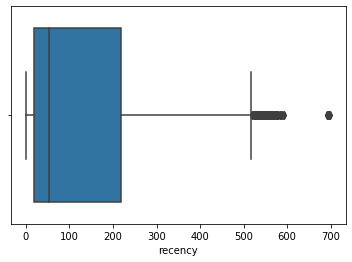

In [40]:
sns.boxplot(rfm_seller_df['recency'])

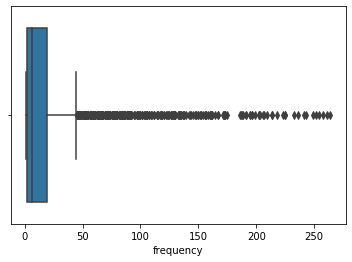

In [41]:
sns.boxplot(rfm_seller_df['frequency'])

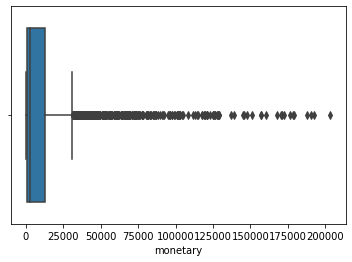

In [42]:
sns.boxplot(rfm_seller_df['monetary'])

## Scaling

In [43]:
rfm_seller_df_scaled = rfm_seller_df[['monetary', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_seller_df_scaled = scaler.fit_transform(rfm_seller_df_scaled)
rfm_seller_df_scaled.shape

(2933, 3)

In [44]:
rfm_seller_df_scaled = pd.DataFrame(rfm_seller_df_scaled)
rfm_seller_df_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_seller_df_scaled.head()

,monetary,frequency,recency
0,0.308225,-0.473986,1.056679
1,4.661899,4.878385,-0.531480
2,-0.492369,-0.529451,-0.685555
3,-0.393650,0.801708,0.007783
4,3.459901,3.408563,-0.104811


### Lets do some Customer Sentiment Analysis using the review comments

In [45]:
order_reviews_df.head()

,Unnamed: 0,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NONE,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NONE,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NONE,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
len(order_reviews_df)

99224

We need real review messages so lets drop the NONE values

In [47]:
reviews_df = order_reviews_df[~(order_reviews_df['review_comment_message'] == 'NONE')]

In [48]:
reviews_df.head()

,Unnamed: 0,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


Lets only keep the review messages and the review score to see what the customers are liking and disliking 

In [49]:
reviews_df = reviews_df[['review_score','review_comment_message']]

In [50]:
reviews_df.head()

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."


Lets do some cleaning of the review messages

In [51]:
!python -m spacy download pt_core_news_sm

/srv/hops/anaconda/envs/theenv/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
2021-11-03 10:35:00.610250: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 21.9 MB 16.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [52]:
import re, nltk, spacy, string
import pt_core_news_sm
nlp = pt_core_news_sm.load()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Cleaning the messages

In [53]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets if any
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [54]:
reviews_df.review_comment_message = reviews_df.review_comment_message.apply(lambda x: clean_text(x))

### Lemmatizing the words

In [55]:
# portugese stopwords
stopwords = nlp.Defaults.stop_words

# lemmatizer function
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
reviews_df['lemma'] = reviews_df.review_comment_message.apply(lambda x: lemmatizer(x))

In [ ]:
reviews_df.head(10)

### Unigrams, Bigram, Trigrams Frequency Analysis

In [ ]:
#top 30 bigram frequency among the reviews

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words=stopwords).fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [ ]:
top_30_unigrams = get_top_n_bigram(reviews_df.lemma,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(reviews_df.lemma,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(reviews_df.lemma,ngram=3, top=30)

In [ ]:
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

In [ ]:
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [ ]:
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

## TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words=stopwords)
dtm = tfidf.fit_transform(reviews_df.lemma)

In [ ]:
tfidf.get_feature_names()[:10]

In [ ]:
len(tfidf.get_feature_names())

In [ ]:
reviews_df.review_score.value_counts()

## Using NMF for Topic modelling for the review messages

Lets pick 5 has the n_components as the review_score is also of 5 point grades

In [ ]:
from sklearn.decomposition import NMF

#Load nmf_model with the n_components 
num_topics =  5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [ ]:
colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(reviews_df.lemma))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
reviews_df['topic'] = significant_topic

In [ ]:
pd.set_option('display.max_colwidth', -1)
reviews_df[['review_comment_message','lemma','review_score','topic']][reviews_df.topic==0].head(20)

In [ ]:
temp = reviews_df[['review_comment_message','lemma','review_score','topic']].groupby('topic').head(20)
temp.sort_values('topic')

## Translating Portugese to English using Google Translator
### Attempting to provide better names to the topic indexes thus obtained above

In [ ]:
!pip install google_trans_new

In [ ]:
#  google translate from portuguese to english
from google_trans_new import google_translator
translator = google_translator()

def translate_pt_to_eng(sent):
    translated_sent = translator.translate(sent,lang_tgt='en',lang_src='pt')
    return translated_sent

In [ ]:
!pip install --user googletrans

In [ ]:
from googletrans import Translator
translator = Translator()


In [ ]:
translator.translate('veritas lux mea', src='la', dest='en')

In [ ]:
reviews_df['lemma'].head()

In [ ]:
print(translate_pt_to_eng('receber prazo estipular'))

In [ ]:
reviews_df['lemma'] = reviews_df['lemma'].apply(lambda x : translate_pt_to_eng(x))